In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
def read_hessian(filename):

    hess = np.loadtxt(filename, skiprows=1)

    n = np.sqrt(len(hess) * 3).astype(int)

    hess = hess.reshape(n, n)

    hess = (hess.T + hess) / 2

    val = np.linalg.eigvals(hess)

    freq = np.sqrt(val[val > 0])

    with open(filename, 'r') as file:
        pe = float(file.readline())

    return freq, pe


planck = 6.582e-4 # ev/THz

[ 0.02813205  0.09258554 -0.29337376]


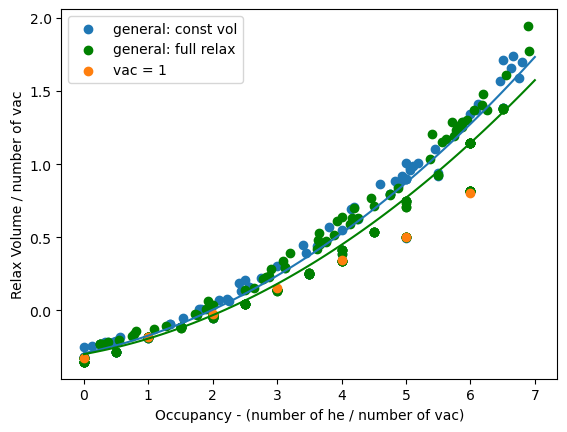

In [20]:
data = np.loadtxt('../../vhe_rvol.txt')
data1 = np.loadtxt('../../vhe_rvol1.txt')
x = np.linspace(0, 7, 100)

plt.scatter(data[:, 1], data[:, 0], label = 'general: const vol')

p = np.polyfit(data[:, 1], data[:, 0], deg = 2)

plt.plot(x, np.polyval(p, x), color='tab:blue')

p1 = np.polyfit(data1[:, 1], data1[:, 0], deg = 2)

plt.scatter(data1[:, 1], data1[:, 0], label = 'general: full relax', color='green')



rvolhe = np.array([-0.32418104, -0.18449139, -0.02301207,  0.15277349,  0.34445098,  0.50455252, 0.80435608])

plt.scatter(np.arange(len(rvolhe)),rvolhe, label = 'vac = 1', color='tab:orange')


plt.plot(x, np.polyval(p1, x), color='g')

print(p)

plt.xlabel('Occupancy - (number of he / number of vac)')

plt.ylabel('Relax Volume / number of vac')

plt.legend()

[ 0.01166806  0.11435731 -0.3168942 ]
[ 0.02870522  0.06734414 -0.31609412]
[ 0.02352252  0.14367244 -0.29962933]
[ 0.02941042  0.0827164  -0.25643612]
[ 0.03388637  0.06031992 -0.22052287]


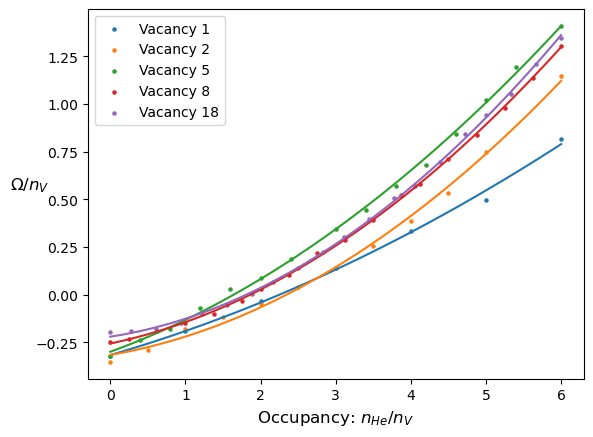

In [21]:
npdata = np.loadtxt('../../vhe_rvol2.txt')

data = {'x': npdata[:, 1],
        'y': npdata[:, 0], 
        'Vacancy': npdata[:, 3].astype(int)}
dfhe = pd.DataFrame(data)

npdata = np.loadtxt('../../vh_rvol.txt')

data = {'x': npdata[:, 1],
        'y': npdata[:, 0], 
        'Vacancy': npdata[:, 3].astype(int)}
dfh = pd.DataFrame(data)

# Group by 'curve' and plot each group
fig, ax = plt.subplots()

for curve_id, group in dfhe.groupby('Vacancy'):
    ax.scatter(group['x'], group['y'], marker='o', label=f'Vacancy {curve_id}', s = 5)
    _p = np.polyfit(group['x'], group['y'], deg=2)
    x_plot = np.linspace(0, 6, 100)
    print(_p)

    ax.plot(x_plot, np.polyval(_p, x_plot))

ax.set_xlabel(r'Occupancy: $n_{He}/n_V$', fontsize = 12)
ax.set_ylabel(r'$\Omega/n_V$', rotation=0, fontsize = 12)
# ax.set_title('Multiple Curves Plot')
ax.legend()
plt.show()


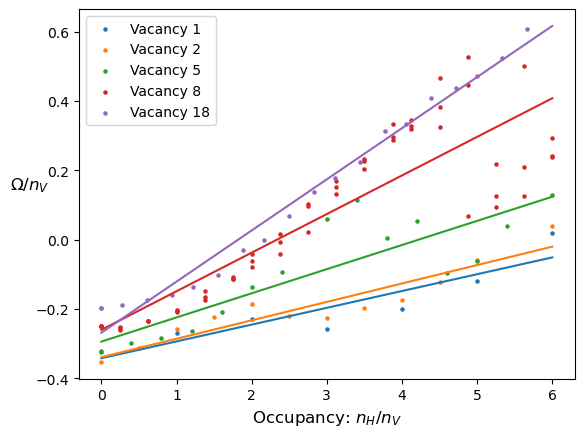

In [22]:

# Group by 'curve' and plot each group
fig, ax = plt.subplots()

for curve_id, group in dfh.groupby('Vacancy'):
    ax.scatter(group['x'], group['y'], marker='o', label=f'Vacancy {curve_id}', s = 5)
    _p = np.polyfit(group['x'], group['y'], deg=1)
    x_plot = np.linspace(0, 6, 100)

    ax.plot(x_plot, np.polyval(_p, x_plot))

ax.set_xlabel(r'Occupancy: $n_H/n_V$', fontsize = 12)
ax.set_ylabel(r'$\Omega/n_V$', rotation=0, fontsize = 12)
# ax.set_title('Multiple Curves Plot')
ax.legend()
plt.show()


[ 0.01166806  0.11435731 -0.3168942 ]
[ 0.02870522  0.06734414 -0.31609412]
[ 0.02352252  0.14367244 -0.29962933]
[ 0.02941042  0.0827164  -0.25643612]
[ 0.03388637  0.06031992 -0.22052287]


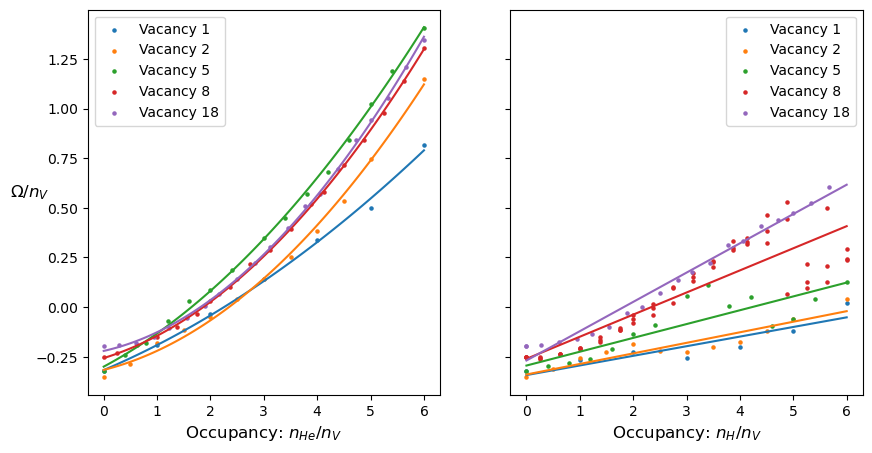

In [23]:
# Group by 'curve' and plot each group
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize = (10, 5))

for curve_id, group in dfhe.groupby('Vacancy'):
    ax[0].scatter(group['x'], group['y'], marker='o', label=f'Vacancy {curve_id}', s = 5)
    _p = np.polyfit(group['x'], group['y'], deg=2)
    x_plot = np.linspace(0, 6, 100)
    print(_p)

    ax[0].plot(x_plot, np.polyval(_p, x_plot))

ax[0].set_xlabel(r'Occupancy: $n_{He}/n_V$', fontsize = 12)
ax[0].set_ylabel(r'$\Omega/n_V$', rotation=0, fontsize = 12)

for curve_id, group in dfh.groupby('Vacancy'):
    ax[1].scatter(group['x'], group['y'], marker='o', label=f'Vacancy {curve_id}', s = 5)
    _p = np.polyfit(group['x'], group['y'], deg=1)
    x_plot = np.linspace(0, 6, 100)

    ax[1].plot(x_plot, np.polyval(_p, x_plot))

ax[1].set_xlabel(r'Occupancy: $n_H/n_V$', fontsize = 12)
# ax[1].set_ylabel(r'$\Omega/n_V$', rotation=0, fontsize = 12)
ax[0].legend()
ax[1].legend()
plt.show()

[0.0562641  0.09258554]


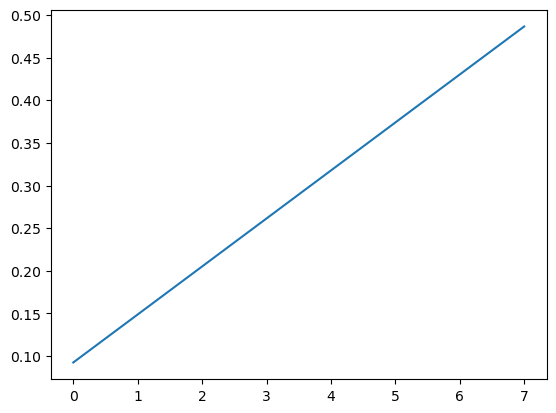

In [24]:
pder = np.polyder(p, m = 1)
print(pder)
plt.plot(x, np.polyval(pder, x))

[0.05377251 0.0795416 ]


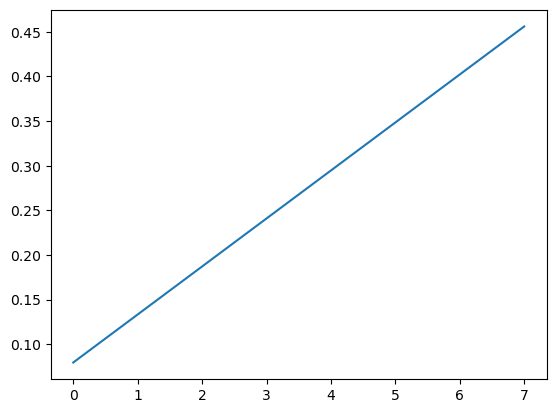

In [25]:
pder = np.polyder(p1, m = 1)
print(pder)
plt.plot(x, np.polyval(pder, x))

In [26]:
np.linspace(0, 7, 7)

array([0.        , 1.16666667, 2.33333333, 3.5       , 4.66666667,
       5.83333333, 7.        ])

In [27]:
tet_freq, tet_pe = read_hessian('tet_hessian.dat')
tri_freq, tri_pe = read_hessian('tri_hessian.dat')
oct_freq, oct_pe = read_hessian('oct_hessian.dat')
pft_freq, pft_pe = read_hessian('perfect_hessian.dat')

FileNotFoundError: tet_hessian.dat not found.

In [ ]:

tet_e = tet_pe + 0.5*np.sum(tet_freq * planck)
tri_e = tri_pe + 0.5*np.sum(tri_freq * planck)
oct_e = oct_pe + 0.5*np.sum(oct_freq * planck)
pft_e = pft_pe + 0.5*np.sum(pft_freq * planck)

print(tet_e - pft_e)
print(tri_e - tet_e)
print(oct_e - tet_e)

6.883217153963415
0.04010781352644699
0.12368871042644969


In [ ]:
tet_freq = np.sort(tet_freq)[::-1]
oct_freq = np.sort(oct_freq)[::-1]
tri_freq = np.sort(tri_freq)[::-1]
pft_freq = np.sort(pft_freq)[::-1]

np.prod(tet_freq[:len(tri_freq)]/tri_freq) * tet_freq[-1]

65.9995053319282

In [ ]:
np.sqrt(np.prod(tet_freq[:len(oct_freq)]/oct_freq) * oct_freq[-2] * oct_freq[-1])

118.66463076367727

(array([3., 2., 3., 0., 3., 0., 2., 2., 2., 1.]),
 array([25.79005273, 27.34097427, 28.89189581, 30.44281734, 31.99373888,
        33.54466042, 35.09558196, 36.64650349, 38.19742503, 39.74834657,
        41.29926811]),
 <BarContainer object of 10 artists>)

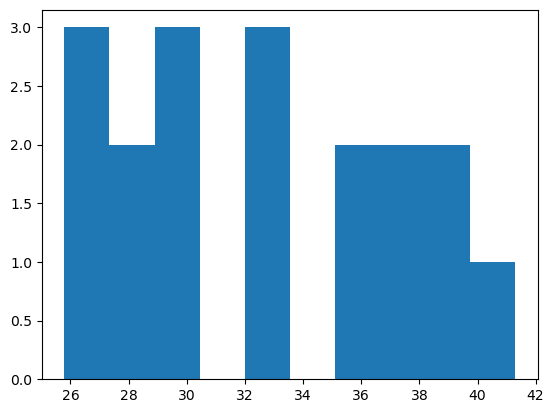

In [ ]:
plt.hist(pft_freq)